<a href="https://colab.research.google.com/github/jmoralespineda/machine-learning/blob/main/P1_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PUNTO_1**

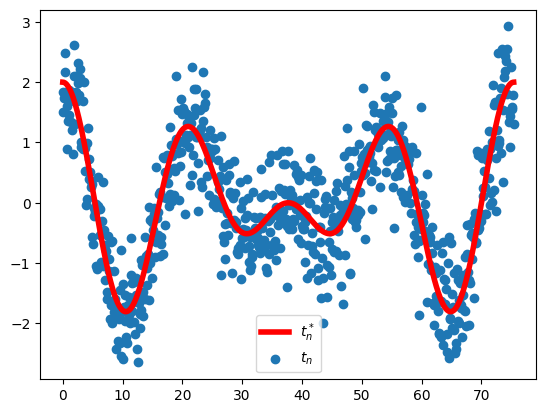

In [24]:
import numpy as np      # Importamos las librerias para los calculos matematicos
import matplotlib.pyplot as plt

N = 700                                                 #definimos el numero de datos = 700
x_n = np.linspace(0,24*np.pi,N)                         # Se genera un conjunto de puntos de datos X_n paragenerar valores equidistantes entre 0 y 24pi
t_n = np.cos(x_n/3)+np.cos(x_n/4)                       # Se genera una variable como la suma de dos señales coseno con diferentes frecuencias
#SNR
var_r = 0.3
t_nr = t_n + np.sqrt(var_r)*np.random.randn(N)          # se agrega el ruido Gaussiano para t_n que permita simular los datos observados para t_nr
plt.plot(x_n,t_n,label='$t_n^*$',c='r',linewidth=4)     #  Se traza la señal original t_n en rojo y se etiqueta como "Real"
plt.scatter(x_n,t_nr,label='$t_n$')                     # Se trazan los datos observados t_nr como puntos dispersos y se etiquetan como "Observado".
plt.legend()                                            # Se muestra el gráfico resultante
plt.show()

In [25]:
#mapeo no lineal
from sklearn.preprocessing import PolynomialFeatures # Importamos datos de las librerias sklearn
from sklearn.model_selection import train_test_split
# Se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando train_test_split() de scikit-learn.
X_train, X_test, t_train, t_test = train_test_split(x_n.reshape(-1,1), t_nr.reshape(-1,1),
                                                    test_size=200/N, random_state=42)
# Se utiliza un tamaño de prueba relativo al tamaño total de los datos  test_size=200/N
print(X_train.shape,X_test.shape,t_train.shape,t_test.shape)

(500, 1) (200, 1) (500, 1) (200, 1)


In [26]:
# Mapeo Polinomico
degree = 3  # definimos el grado del polinomio
poly_features = PolynomialFeatures(degree=degree) # se crea un objeto con el grado especificado
X_train_poly = poly_features.fit_transform(X_train)   # Se aplica el mapeo polinómico a los conjuntos de entrenamiento y prueba utilizando fit_transform() y transform() respectivamente.
X_test_poly = poly_features.transform(X_test)
W_MAP, sigma_sq_MAP = fit_MAP(X_train_poly, t_train) # Se utiliza la función fit_MAP definida anteriormente para ajustar el modelo MAP a los datos de entrenamiento.

In [27]:
print("Parámetros MAP:")
print("W_MAP:", W_MAP)
print("sigma_sq_MAP:", sigma_sq_MAP)

Parámetros MAP:
W_MAP: [-5.10593083e-01  3.97956277e-02 -9.65735194e-04  7.06791459e-06]
sigma_sq_MAP: 2.1703667891916925


In [28]:
# Importamos las bibliotecas para realizar los calculos matematicos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Funciones para MAP
#Esta función calcula el logaritmo de la función de verosimilitud, que mide la probabilidad de observar los datos t
# dada una configuración de parámetros W y una varianza del ruido sigma cuadrado

def likelihood(W, X, t, sigma_sq):
    N = X.shape[0]
    phi = X @ W
    log_likelihood = -0.5 * N * np.log(2 * np.pi * sigma_sq)
    log_likelihood -= 0.5 * np.sum((t - phi) ** 2) / sigma_sq
    return -log_likelihood
# Esta función calcula el logaritmo del prior, que representa el conocimiento previo
# o las creencias sobre los parámetros W y sigma cuadrado antes de observar los datos

def prior(W, sigma_sq):
    log_prior_W = -0.5 * np.sum(W ** 2) / sigma_sq
    log_prior_sigma_sq = (2 - 1) * np.log(sigma_sq) - 2 * np.log(1) - sigma_sq / 1
    return log_prior_W + log_prior_sigma_sq

#Esta función calcula el logaritmo de la función de densidad a posteriori,
# que combina la información de la verosimilitud y el prior,
# y es la función que queremos maximizar en el método de Máximo a Posteriori (MAP).
def log_posterior(W_sigma_sq, X, t):
    W = W_sigma_sq[:-1]
    sigma_sq = W_sigma_sq[-1]
    return -likelihood(W, X, t, sigma_sq) - prior(W, sigma_sq)

#Esta función define el objetivo de optimización, que es simplemente el negativo de la función de densidad a posteriori.
# Esto se hace porque la mayoría de los optimizadores buscan minimizar una función.
def objective(W_sigma_sq, X, t):
    return -log_posterior(W_sigma_sq, X, t)

# Esta función ajusta el modelo utilizando el método de Máximo a Posteriori (MAP). Primero, inicializa los parámetros W
# aleatoriamente y sigma cuadrado a 1. Luego, utiliza el optimizador minimize para encontrar los valores de W y sigma cuadrado
# que maximizan la función de densidad a posteriori.
# Finalmente, devuelve estos valores como los parámetros estimados MAP.
def fit_MAP(X, t):
    W_init = np.random.randn(X.shape[1])
    sigma_sq_init = 1
    W_sigma_sq_init = np.concatenate([W_init, [sigma_sq_init]])
    result = minimize(objective, W_sigma_sq_init, args=(X, t), method='L-BFGS-B')
    W_MAP, sigma_sq_MAP = result.x[:-1], result.x[-1]
    return W_MAP, sigma_sq_MAP

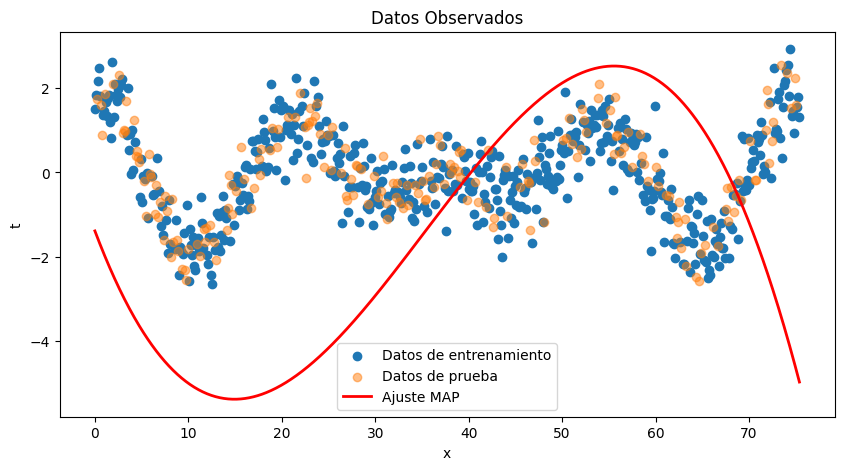

Parámetros MAP:
W_MAP: [-1.38751974e+00 -5.87388670e-01  2.49469410e-02 -2.35910674e-04]
sigma_sq_MAP: 1.3270555849939263


In [29]:
# Ajuste del modelo MAP
W_MAP, sigma_sq_MAP = fit_MAP(X_train_poly, t_train)

# Visualización de resultados
plt.figure(figsize=(10, 5))

# Gráfico de datos observados
plt.scatter(X_train, t_train, label='Datos de entrenamiento')
plt.scatter(X_test, t_test, label='Datos de prueba', alpha=0.5)
plt.xlabel('x')
plt.ylabel('t')
plt.title('Datos Observados')
plt.legend()

# Gráfico de ajuste del modelo MAP
X_range = np.linspace(0, 24*np.pi, 1000)
X_range_poly = poly_features.transform(X_range.reshape(-1, 1))
t_range_pred = X_range_poly @ W_MAP
plt.plot(X_range, t_range_pred, label='Ajuste MAP', color='red', linewidth=2)
plt.legend()

plt.show()

print("Parámetros MAP:")
print("W_MAP:", W_MAP)
print("sigma_sq_MAP:", sigma_sq_MAP)